### 3.1.1 신경망의 예

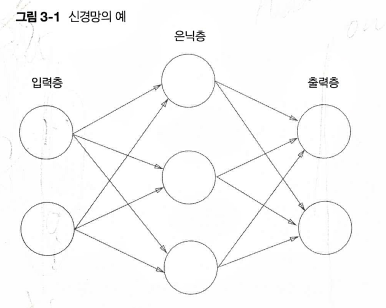

### 3.1.2 퍼셉트론 복습

* AND, OR, NAND

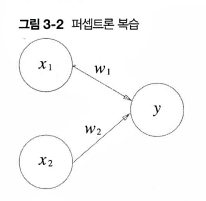

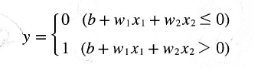

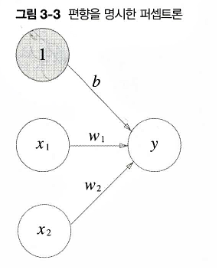

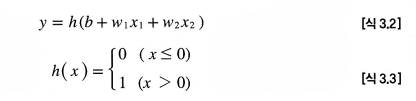

* 입력 신호의 총합을 출력 신호로 변환하는 함수 

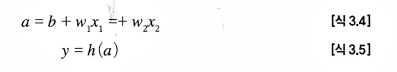

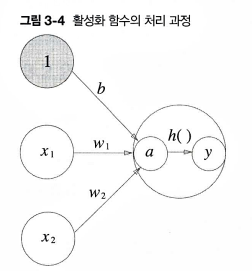

## 3.2 활성화 함수

### 시그모이드 함수

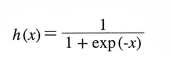

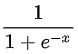

### 계단 함수(Step function)

In [1]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))   

In [12]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

In [13]:
x = np.arange(-5.0, 5.0, 0.1)

In [14]:
y1 = sigmoid(x)
y2 = step_function(x)

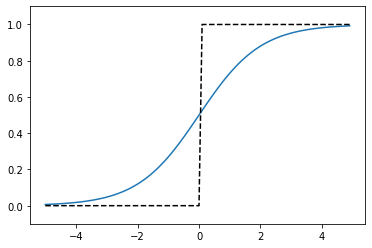

In [16]:
plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

#### ReLU 함수 
* Rectifed Linear Unit
* 입력 0을 넘으면 그 입력을 그대로 출력 
* 입력 0 이하면 0을 출력하는 함수

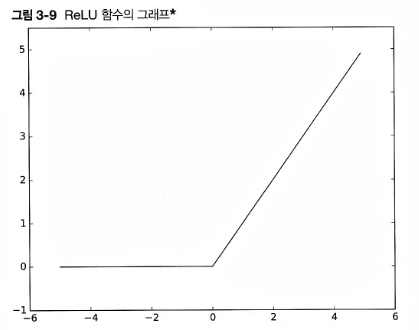

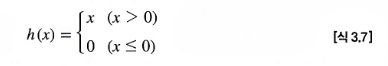

In [17]:
def relu(x):
    return np.maximum(0, x)

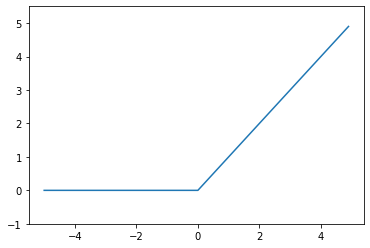

In [18]:
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

### 다차원 배열의 계산 

#### 3.3.1 다차원 배열 

In [19]:
A = np.array([1,2,3,4])

In [20]:
A

array([1, 2, 3, 4])

In [21]:
A.ndim

1

In [30]:
B = np.arange(1,7)

In [32]:
B = B.reshape(3,2)

In [33]:
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [34]:
B.shape[1]

2

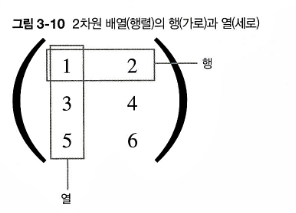

### 3.3.2 행렬의 내적(행렬 곱)

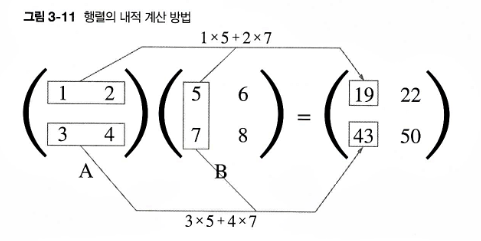

In [55]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])

In [56]:
A.shape

(2, 2)

In [57]:
B.shape

(2, 2)

In [58]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

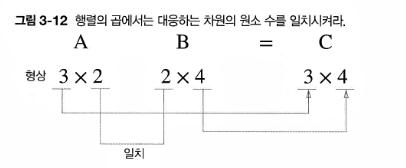

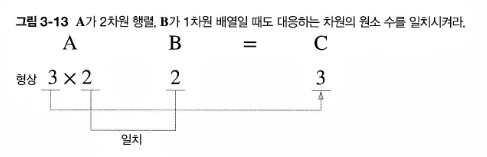

In [59]:
A = np.array([[1,2], [3,4], [5,6]])

In [64]:
A = np.arange(1,7).reshape(3,2)

In [65]:
B = np.array([7,8])

In [69]:
A.shape

(3, 2)

In [70]:
B.shape

(2,)

In [73]:
np.dot(A,B).shape

(3,)

#### 3.3.3 신경망의 내적

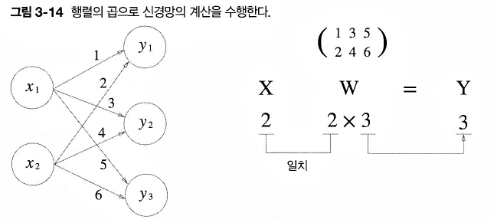

### 3.4 3층 신경망 구현하기

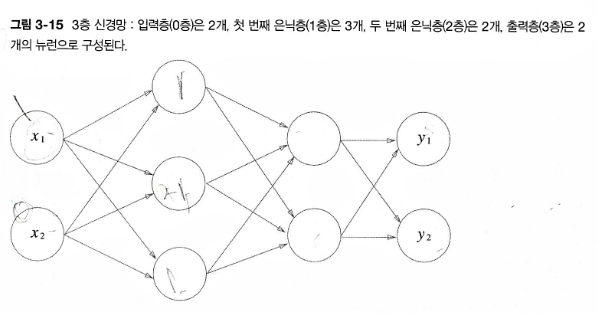

#### 3.4.1. 표기법 설명

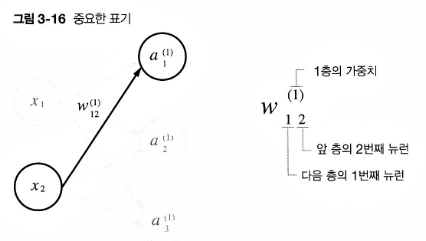

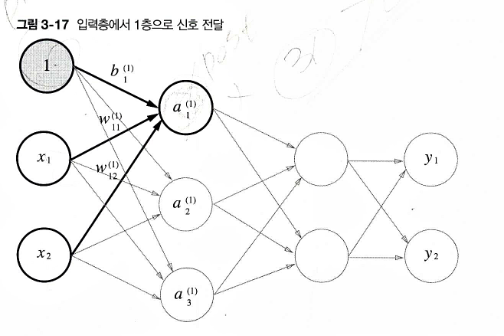

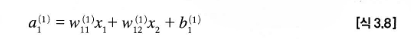

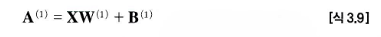

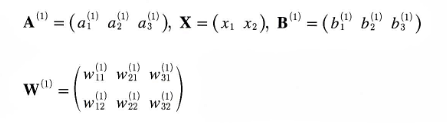

In [74]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

In [75]:
print (f"{X.shape}, {W1.shape}, {B1.shape}")

(2,), (2, 3), (3,)


In [78]:
A1 = np.dot(X, W1) + B1

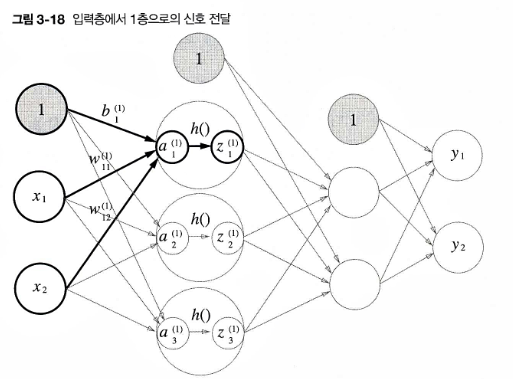

In [82]:
Z1 = sigmoid(A1)

In [83]:
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [84]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [85]:
A2 = np.dot(Z1, W2) + B2

In [86]:
Z2 = sigmoid(A2)

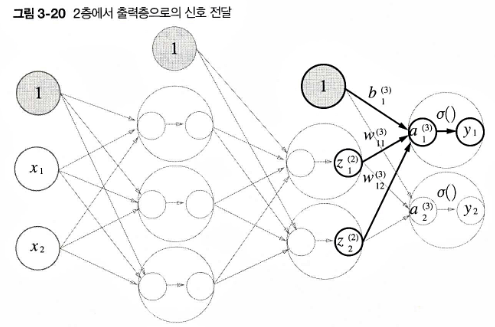

In [87]:
def identity_fuction(x):
    return x

In [88]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [89]:
A3 = np.dot(Z2, W3) + B3

In [90]:
Y = identity_fuction(A3)

In [91]:
Y

array([0.31682708, 0.69627909])

### 3.4.2 구현 정리

In [102]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['B1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['B2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['B3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['B1'], network['B2'], network['B3']
    
    a1 = np.dot(x, W1) + B1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + B2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + B3
    y = identity_fuction(a3)
    
    return y

In [103]:
network = init_network()

In [104]:
x = np.array([1.0, 0.5])

In [105]:
y = forward(network, x)

In [106]:
y

array([0.31682708, 0.69627909])

### 출력층 설계하기 
* 회귀에는 항등 함수를 분류에는 소프트맥스 함수를 사용

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

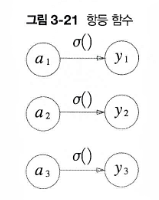

##### 소프트맥스 함수

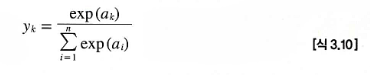

* n은 출력층의 뉴런 수, y_k는 그중에서 k번째 출력을 의미 
* 소프트맥스 함수의 분자는 입력 신호 a_k의 지수 함수
* 분모는 모든 입력 신호의 지수 함수의 합

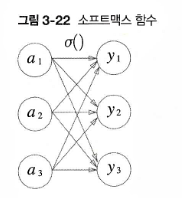

In [107]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)

In [108]:
exp_a

array([ 1.34985881, 18.17414537, 54.59815003])

In [110]:
sum_exp_a = np.sum(exp_a)

In [111]:
y = exp_a / sum_exp_a

In [112]:
y

array([0.01821127, 0.24519181, 0.73659691])

In [113]:
np.sum(y)

1.0

In [114]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

#### 3.5.2 소프트맥스 함수 구현시 주의점

In [115]:
a = np.array([1010, 1000, 990])

In [116]:
np.exp(a)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


array([inf, inf, inf])

In [117]:
2.7182 ** 1010

OverflowError: (34, 'Result too large')

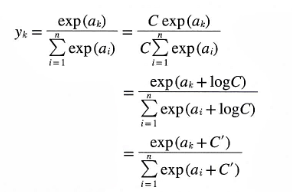

In [118]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

* forward propagation

### 3.6 손글씨 숫자인식

#### 3.6.1 MNIST 데이터셋

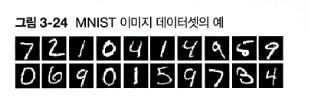

In [122]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)


In [123]:
img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img)

5
(784,)
(28, 28)


In [124]:
set(t_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [125]:
print (x_train.shape)
print (t_train.shape)
print (x_test.shape)
print (t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [127]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


In [129]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0

In [142]:
28* 28

784

In [147]:
network

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
        -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
         0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
         0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
        -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
        -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
         0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
        -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
         0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
        -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
        -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
         0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
         0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
         0.02454282,  0.05875788,  0.08505439

In [153]:
%%timeit
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
1.51 s ± 90.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)



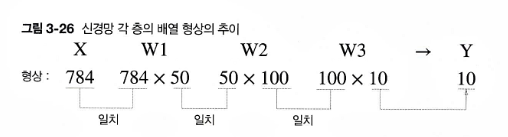

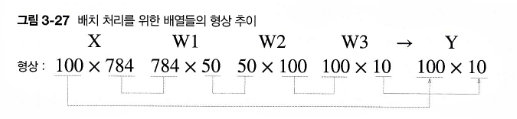

In [154]:
%%timeit
batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy:0.9352
Accuracy

1.51 s ± 90.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)